In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import organs.system as system
from organs.index import Index
import organs.index as index

In [75]:
p = system.init()

n = len(Index)
y0 = np.zeros(n)

MMglucose = 180.16
MMfructose = 180.16
MMfattyacid = 256.43
MMprotein = 40000

glucosein = 100 #g
fructosein= 10 #g
fattyacidin= 10

def y0_init(y0: np.ndarray):
    y0[Index.plasma_glucose] = 5.5 #gmmol
    y0[Index.plasma_insulin] = 1.2 #g/L
    y0[Index.plasma_fattyacid] = 0.4 #mmol/L
    y0[Index.plasma_aminoacid] = 0.2 #mmol/L
    y0[Index.vsc_TAG] = 1 * 1000 /p.V.vsc  # g/L
    y0[Index.subq_TAG] = 10 * 1000 /p.V.subq  # g/L

    # volume of skeletal muscle is ~25.0L
    y0[Index.muscle_NAD] = 1.6*(60*.4)/25 #mmol/L 
    y0[Index.muscle_NADH] = 0.15*(60*.4)/25 #mmol/L

    #no certain data for FAD and FADH2, but assume its around 1/3 of NAD
    y0[Index.muscle_FAD] = 1.6*(60*.4)/25/3 # NOTE: NEED UNITS
    y0[Index.muscle_FADH2] = 0.15*(60*.4)/25/3 # NOTE: NEED UNITS

    y0[Index.gut_glucose] = glucosein/MMglucose*1000/p.V.gut # NOTE: NEED UNITS
    y0[Index.gut_fructose] = fructosein/MMglucose*1000/p.V.gut # NOTE: NEED UNITS # NOTE: NEED UNITS
    y0[Index.membrane_fattyacid] = fattyacidin/MMfattyacid*1000/p.V.gut # NOTE: NEED UNITS
    return

y0_init(y0)
t_span = (0, 12)
t_eval = np.linspace(*t_span, 300)


solution = solve_ivp(fun=lambda t, y: system.system(t, y, p),
                     t_span=t_span,
                     y0=y0,
                     t_eval=t_eval,
                     method='LSODA')
y0 = solution.y[:, -1]


y0[Index.gut_glucose] += glucosein/MMglucose*1000/p.V.gut
t_span = (12,24)
t_eval = np.linspace(*t_span, 300)
solution2 = solve_ivp(fun=lambda t, y: system.system(t, y, p),
                     t_span=t_span,
                     y0=y0,
                     t_eval=t_eval,
                     method='LSODA')

solution.t = np.append(solution.t, solution2.t, axis=0)
solution.y = np.append(solution.y, solution2.y, axis=1)
timespan = solution.t

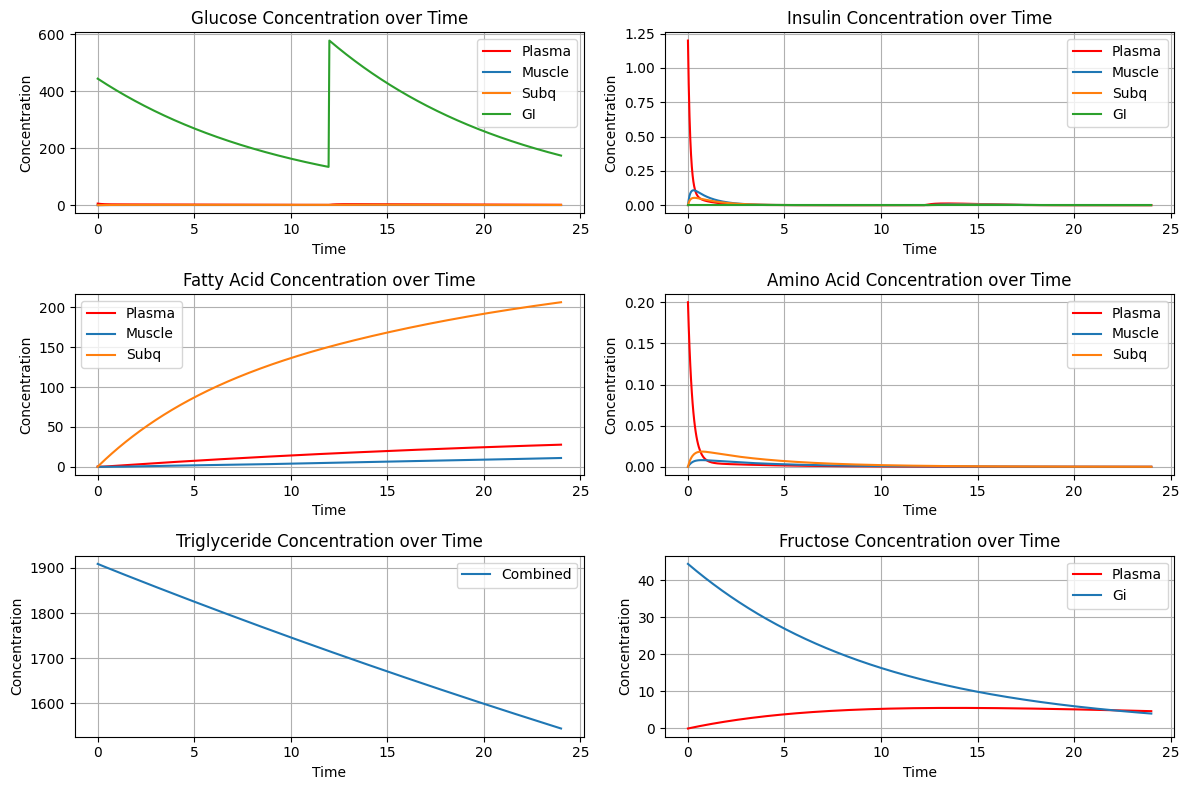

In [76]:
# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(timespan, solution.y[Index.plasma_glucose], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.muscle_glucose], label='Muscle')
plt.plot(timespan, solution.y[Index.subq_glucose], label='Subq')
plt.plot(timespan, solution.y[Index.gut_glucose], label='GI')
#plt.plot(timespan, solution.y[Index.liver_glucose], label='Liver')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Glucose Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(timespan, solution.y[Index.plasma_insulin], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.muscle_insulin], label='Muscle')
plt.plot(timespan, solution.y[Index.subq_insulin], label='Subq')
plt.plot(timespan, np.zeros(len(timespan)), label='GI')
#plt.plot(timespan, solution.y[Index.liver_insulin], label='Liver')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Insulin Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(timespan, solution.y[Index.plasma_fattyacid], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.muscle_fattyacid], label='Muscle')
plt.plot(timespan, solution.y[Index.subq_fattyacid], label='Subq')
#plt.plot(timespan, solution.y[Index.membrane_fattyacid], label='GI')
#plt.plot(timespan, solution.y[Index.liver_insulin], label='Liver')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Fatty Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(timespan, solution.y[Index.plasma_aminoacid], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.muscle_aminoacid], label='Muscle')
plt.plot(timespan, solution.y[Index.subq_aminoacid], label='Subq')
#plt.plot(timespan, solution.y[Index.gut_aminoacid], label='GI')
#plt.plot(timespan, solution.y[Index.liver_aminoacid], label='Liver')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Amino Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(timespan, solution.y[Index.subq_TAG]+solution.y[Index.vsc_TAG], label='Combined')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Triglyceride Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(timespan, solution.y[Index.plasma_fructose], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.gut_fructose], label='Gi')
#plt.plot(timespan, solution.y[Index.liver_fructose], label='Liver')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Fructose Concentration over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

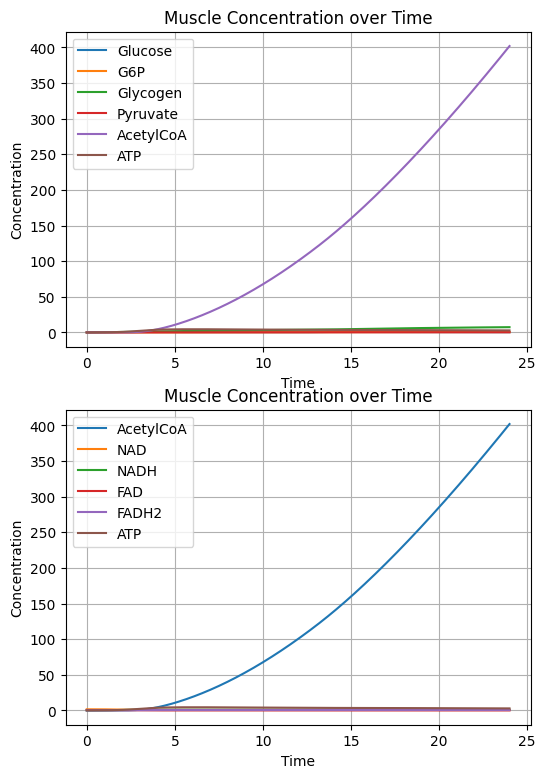

In [77]:
plt.figure(figsize=(6, 9))
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[Index.muscle_glucose], label='Glucose')
plt.plot(timespan, solution.y[Index.muscle_G6P], label='G6P')
plt.plot(timespan, solution.y[Index.muscle_glycogen], label='Glycogen')
plt.plot(timespan, solution.y[Index.muscle_pyruvate], label='Pyruvate')
plt.plot(timespan, solution.y[Index.muscle_ACoA], label='AcetylCoA')
plt.plot(timespan, solution.y[Index.muscle_ATP], label='ATP')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(timespan, solution.y[Index.muscle_ACoA], label='AcetylCoA')
plt.plot(timespan, solution.y[Index.muscle_NAD], label='NAD')
plt.plot(timespan, solution.y[Index.muscle_NADH], label='NADH')
plt.plot(timespan, solution.y[Index.muscle_FAD], label='FAD')
plt.plot(timespan, solution.y[Index.muscle_FADH2], label='FADH2')
plt.plot(timespan, solution.y[Index.muscle_ATP], label='ATP')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

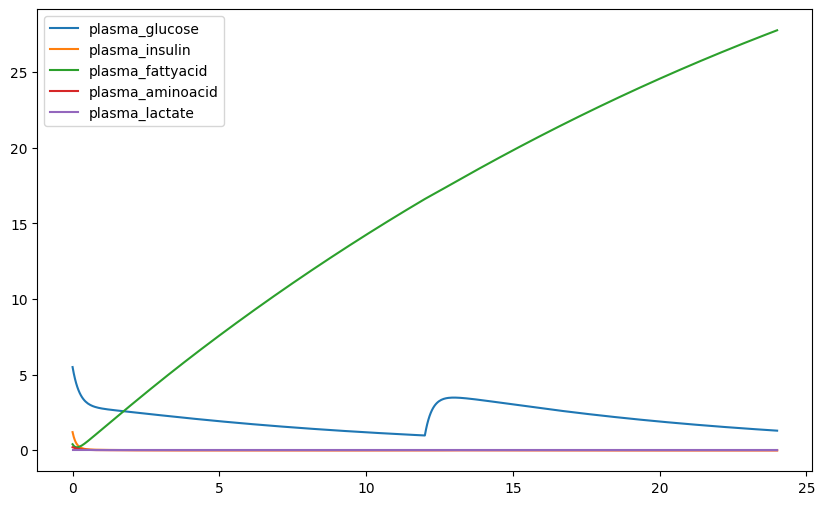

In [78]:
plasma_indices = index.get_plasma_indices()
plasma_names = index.get_plasma_names()

plt.figure(figsize=(10, 6))
for idx, name in zip(plasma_indices, plasma_names):
    plt.plot(timespan, solution.y[idx], label=name)
plt.legend()
plt.show()

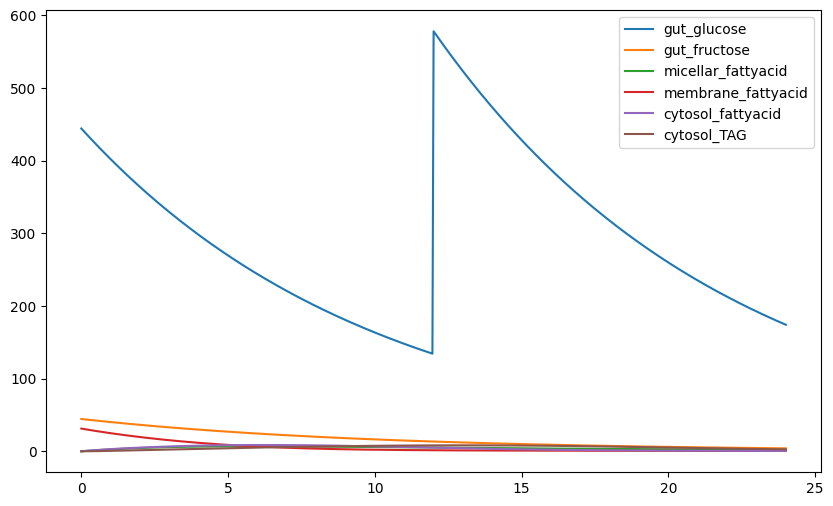

In [79]:
gut_indices = index.get_gut_indices()
gut_names = index.get_gut_names()

plt.figure(figsize=(10, 6))
for idx, name in zip(gut_indices, gut_names):
    plt.plot(timespan, solution.y[idx], label=name)
plt.legend()
plt.show()

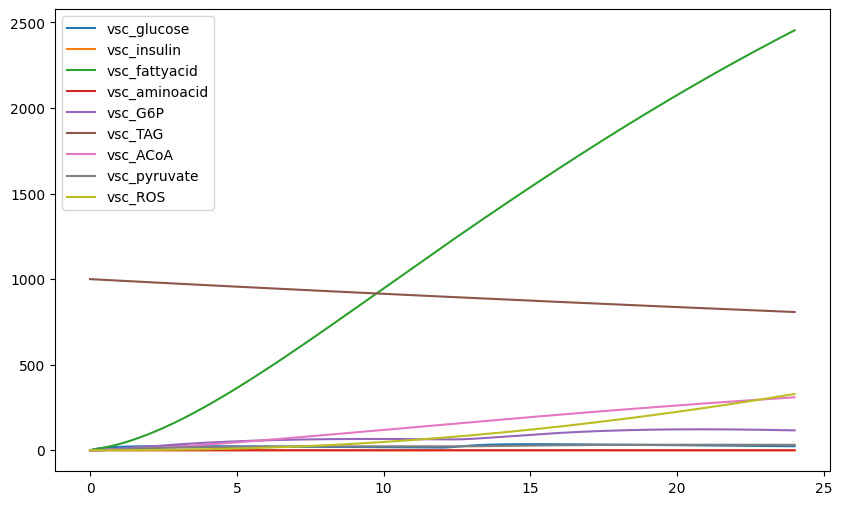

In [80]:
vsc_indices = index.get_vsc_indices()
vsc_names = index.get_vsc_names()

plt.figure(figsize=(10, 6))
for idx, name in zip(vsc_indices, vsc_names):
    plt.plot(timespan, solution.y[idx], label=name)
plt.legend()
plt.show()

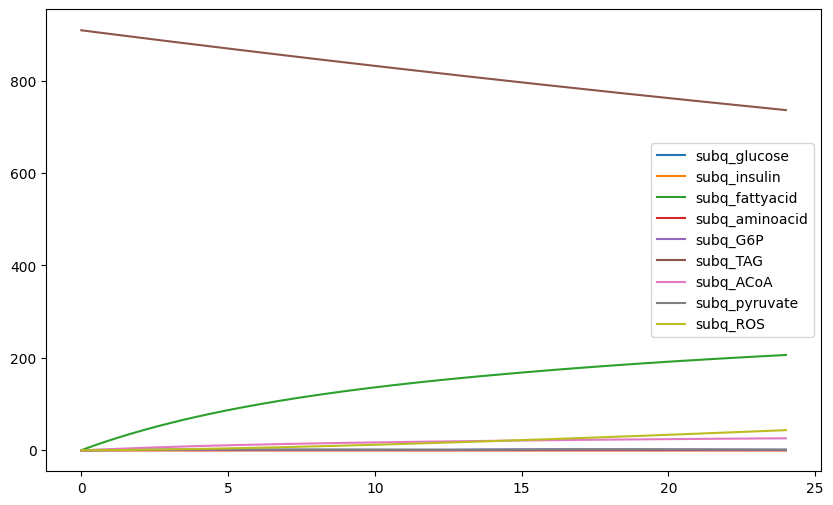

In [81]:
subq_indices = index.get_subq_indices()
subq_names = index.get_subq_names()

plt.figure(figsize=(10, 6))
for idx, name in zip(subq_indices, subq_names):
    plt.plot(timespan, solution.y[idx], label=name)
plt.legend()
plt.show()